In [ ]:
#Necessary libraries
library(ggplot2)
library(dplyr)

# CAMEL model
* Estimate the **credit risk** (assessment based on scoring system) of euro area banks based on CAMEL model as of Dec. 2022.

- replace sector with banks’ specializations 

- Do not include management info

* over-time (not required) or 
* compare with one market based measure of credit list for the sample of listed banks only.
* **Database**: Bankfocus

## Commercial Banks

* Data Cleaning

In [4]:
setwd('/Users/mariapiabellini/Desktop/Banking')
data <- read.csv("data.csv", sep=";", na.strings="n.a.")
colnames(data)<-c('company','country','CC','year','tot_assets','NPLs2tot_loans','NPLs2tot_equity','allowance_for_loan_loss','provision_for_loan_loss','CAR','equity_capital2tot_assets','NIM','cost2income','ROA','ROE','customer_deposits2tot_assets','LTD','Specialisation')              
head(data)

,company,country,CC,year,tot_assets,NPLs2tot_loans,NPLs2tot_equity,allowance_for_loan_loss,provision_for_loan_loss,CAR,equity_capital2tot_assets,NIM,cost2income,ROA,ROE,customer_deposits2tot_assets,LTD,Specialisation
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BNP PARIBAS,FR,C*,2023,2.863.607.680,"2,89","19,64","69,20","15,28","17,30","4,97","0,73","68,67","0,43","8,95","33,15","73,89",Commercial bank
2,BNP PARIBAS,FR,C2,2023,2.863.607.680,"2,88","19,64","69,20","15,28","17,30","4,97","0,73","69,17","0,43","8,95","33,23","66,30",Commercial bank
3,CREDIT AGRICOLE SA,FR,C2,2023,2.419.285.876,"2,59","16,91","70,76","11,44","17,09","3,65","0,66","56,19","0,34","9,45","23,42","48,18",Commercial bank
4,CREDIT AGRICOLE SA,FR,C*,2022,2.280.481.433,"2,68","19,19","70,03","0,15","16,27","3,25","0,62","57,36","0,29","8,75","22,85","39,73",Commercial bank
5,BANCO SANTANDER SA,ES,C*,2023,1.985.754.401,"3,28","32,45","67,38","29,85","16,31","5,80","2,45","44,85","0,69","12,07","56,19","82,97",Commercial bank
6,BANCO SANTANDER SA,ES,C2,2023,1.985.754.401,"3,25","32,45","67,38","29,85","16,31","5,80","2,45","51,86","0,69","12,07","56,59","86,82",Commercial bank


In [5]:
dim(data)

[1] 942  18

In [13]:
data$Specialisation<-as.factor(data$Specialisation)
bank_counts <- table(data$Specialisation)
bank_counts


 Commercial bank Cooperative bank  Investment bank 
             460              450               32 

# Dataset
The dataset contains 942 banks, with: 460 Commercial banks, 450 Cooperative banks, and 32 Investment banks.

To evaluate the scores for each CAMEL category (Capital adequacy, Asset quality, Earnings, and Liquidity) across commercial, cooperative, and investment banks, we need to establish specific reference values or benchmarks that align with typical industry standards or regulatory guidelines for each bank type. Here’s how we can structure this for each CAMEL category:

* **Capital Adequacy (C)**
Key Metrics: CAR (Capital Adequacy Ratio), equity_capital2tot_assets
Reference Values:
Commercial Banks: Generally, a CAR of at least 10-12% is ideal; equity-to-assets ratio around 8-10% is standard.
Cooperative Banks: Tend to have lower capital ratios, so CAR of 8-10% may suffice; equity-to-assets around 6-8%.
Investment Banks: Higher risk exposure demands a CAR closer to 15%, with equity-to-assets of 10-12% or higher due to market volatility.


* **Asset Quality (A)**
Key Metrics: NPLs2tot_loans, NPLs2tot_equity, allowance_for_loan_loss, provision_for_loan_loss
Reference Values:
Commercial Banks: NPLs-to-total-loans ratio ideally <5%, and a high allowance-to-loan-loss ratio, around 100-120%.
Cooperative Banks: May tolerate slightly higher NPL ratios (up to 7-8%) due to their community focus, with allowances around 80-100%.
Investment Banks: Typically have lower NPLs on loan portfolios but may carry higher market risks. An NPL ratio <3% is preferable, with allowances of around 100% or more if high exposure exists.


* **Earnings (E)**
Key Metrics: NIM (Net Interest Margin), cost2income, ROA (Return on Assets), ROE (Return on Equity)
Reference Values:
Commercial Banks: Aiming for an ROA of 1-1.5%, ROE around 10-15%, NIM of 3-4%, and cost-to-income around 50-60% indicates good profitability.
Cooperative Banks: Lower profit focus means acceptable ROA ~0.5-1%, ROE ~5-8%, NIM around 2-3%, and cost-to-income can be slightly higher at 60-70%.
Investment Banks: Higher profitability expected; target ROA >1.5%, ROE >15%, NIM may be less relevant, and cost-to-income ideally <50%.


* **Liquidity (L)**
Key Metrics: customer_deposits2tot_assets, LTD (Loan-to-Deposit) Ratio
Reference Values:
Commercial Banks: Customer deposits to total assets >60%, and LTD ratio around 80-90% is ideal for maintaining liquidity.
Cooperative Banks: Higher reliance on stable deposits, so customer deposits to assets >70%, and LTD ratio <80%.
Investment Banks: Lower dependence on customer deposits, so deposits-to-assets may be <50%, with a flexible LTD ratio that reflects a balanced liquidity structure.


Using these benchmark values as a reference, we can evaluate the weighted mean for each CAMEL component. If the weighted mean is within or above the recommended ranges, it could signify good performance; below these values may indicate areas for improvement or risk. This approach should offer a structured way to analyze the health of banks across types.

In [14]:
#Checking for NAs
data[data=='#N/A N/A'|data=='#VALORE!'|data=='#N/A Field Not Applicable']=NA
for (col in names(data)) {
  print(paste(col,'missing values:'))
  print(sum(is.na(data[[col]])))
}

[1] "company missing values:"
[1] 0
[1] "country missing values:"
[1] 0
[1] "CC missing values:"
[1] 0
[1] "year missing values:"
[1] 0
[1] "tot_assets missing values:"
[1] 9
[1] "NPLs2tot_loans missing values:"
[1] 71
[1] "NPLs2tot_equity missing values:"
[1] 71
[1] "allowance_for_loan_loss missing values:"
[1] 75
[1] "provision_for_loan_loss missing values:"
[1] 19
[1] "CAR missing values:"
[1] 53
[1] "equity_capital2tot_assets missing values:"
[1] 16
[1] "NIM missing values:"
[1] 12
[1] "cost2income missing values:"
[1] 13
[1] "ROA missing values:"
[1] 2
[1] "ROE missing values:"
[1] 2
[1] "customer_deposits2tot_assets missing values:"
[1] 15
[1] "LTD missing values:"
[1] 19
[1] "Specialisation missing values:"
[1] 0


In [17]:
#Removing columns with too many missing values
missing_counts <- colSums(is.na(data))
df_filtered <- data[, missing_counts <= 70]

In [18]:
for (col in names(data)[c(6:17)]) {
  data[[col]]=as.numeric(gsub(',','.',data[[col]])) 
}
data$tot_assets <- as.numeric(gsub("\\.", "", data$tot_assets))
data <- data[complete.cases(data), ]
head(data)

,company,country,CC,year,tot_assets,NPLs2tot_loans,NPLs2tot_equity,allowance_for_loan_loss,provision_for_loan_loss,CAR,equity_capital2tot_assets,NIM,cost2income,ROA,ROE,customer_deposits2tot_assets,LTD,Specialisation
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,BNP PARIBAS,FR,C*,2023,2863607680,2.89,19.64,69.20,15.28,17.30,4.97,0.73,68.67,0.43,8.95,33.15,73.89,Commercial bank
2,BNP PARIBAS,FR,C2,2023,2863607680,2.88,19.64,69.20,15.28,17.30,4.97,0.73,69.17,0.43,8.95,33.23,66.30,Commercial bank
3,CREDIT AGRICOLE SA,FR,C2,2023,2419285876,2.59,16.91,70.76,11.44,17.09,3.65,0.66,56.19,0.34,9.45,23.42,48.18,Commercial bank
4,CREDIT AGRICOLE SA,FR,C*,2022,2280481433,2.68,19.19,70.03,0.15,16.27,3.25,0.62,57.36,0.29,8.75,22.85,39.73,Commercial bank
5,BANCO SANTANDER SA,ES,C*,2023,1985754401,3.28,32.45,67.38,29.85,16.31,5.80,2.45,44.85,0.69,12.07,56.19,82.97,Commercial bank
6,BANCO SANTANDER SA,ES,C2,2023,1985754401,3.25,32.45,67.38,29.85,16.31,5.80,2.45,51.86,0.69,12.07,56.59,86.82,Commercial bank


# Commercial Banks

* **C**: CAR of at least 10-12% is ideal; equity-to-assets ratio around 8-10% is standard.
* **A**: NPLs-to-total-loans ratio ideally <5%, and a high allowance-to-loan-loss ratio, around 100-120%.
* **E**: Aiming for an ROA of 1-1.5%, ROE around 10-15%, NIM of 3-4%, and cost-to-income around 50-60% indicates good profitability.
* **L** Customer deposits to total assets >60%, and LTD ratio around 80-90% is ideal for maintaining liquidity.

In [38]:
comm<-subset(data, Specialisation=='Commercial bank')
# Capital Adequacy (C) Score
score_C <- function(CAR, equity_to_assets) {
  if (CAR >= 12 && equity_to_assets >= 10) {
    return(5)
  } else if (CAR >= 10 && equity_to_assets >= 8) {
    return(4)
  } else if (CAR >= 8 && equity_to_assets >= 6) {
    return(3)
  } else if (CAR >= 6 && equity_to_assets >= 4) {
    return(2)
  } else {
    return(1)
  }
}

# Asset Quality (A) Score
score_A <- function(NPL_to_loans, allowance_ratio) {
  if (NPL_to_loans < 5 && allowance_ratio >= 120) {
    return(5)
  } else if (NPL_to_loans < 5 && allowance_ratio >= 100) {
    return(4)
  } else if (NPL_to_loans < 7 && allowance_ratio >= 80) {
    return(3)
  } else if (NPL_to_loans < 10) {
    return(2)
  } else {
    return(1)
  }
}

# Earnings (E) Score
score_E <- function(ROA, ROE, NIM, cost_to_income) {
  if (ROA >= 1.5 && ROE >= 15 && NIM >= 4 && cost_to_income <= 50) {
    return(5)
  } else if (ROA >= 1 && ROE >= 10 && NIM >= 3 && cost_to_income <= 60) {
    return(4)
  } else if (ROA >= 0.8 && ROE >= 8 && NIM >= 2.5 && cost_to_income <= 70) {
    return(3)
  } else if (ROA >= 0.5 && ROE >= 5) {
    return(2)
  } else {
    return(1)
  }
}

# Liquidity (L) Score
score_L <- function(deposits_to_assets, LTD) {
  if (deposits_to_assets > 70 && LTD >= 80 && LTD <= 90) {
    return(5)
  } else if (deposits_to_assets > 60 && LTD >= 70 && LTD <= 100) {
    return(4)
  } else if (deposits_to_assets > 50 && LTD >= 60 && LTD <= 110) {
    return(3)
  } else if (deposits_to_assets > 40 && LTD >= 50) {
    return(2)
  } else {
    return(1)
  }
}

# Calculate scores and add them as new columns for each bank in comm
comm$C_score <- mapply(score_C, comm$CAR, comm$equity_capital2tot_assets)
comm$A_score <- mapply(score_A, comm$NPLs2tot_loans, comm$allowance_for_loan_loss)
comm$E_score <- mapply(score_E, comm$ROA, comm$ROE, comm$NIM, comm$cost2income)
comm$L_score <- mapply(score_L, comm$customer_deposits2tot_assets, comm$LTD)

In [25]:
head(comm)

,company,country,CC,year,tot_assets,NPLs2tot_loans,NPLs2tot_equity,allowance_for_loan_loss,provision_for_loan_loss,CAR,⋯,cost2income,ROA,ROE,customer_deposits2tot_assets,LTD,Specialisation,C_score,A_score,E_score,L_score
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,BNP PARIBAS,FR,C*,2023,2863607680,2.89,19.64,69.20,15.28,17.30,⋯,68.67,0.43,8.95,33.15,73.89,Commercial bank,2,2,1,1
2,BNP PARIBAS,FR,C2,2023,2863607680,2.88,19.64,69.20,15.28,17.30,⋯,69.17,0.43,8.95,33.23,66.30,Commercial bank,2,2,1,1
3,CREDIT AGRICOLE SA,FR,C2,2023,2419285876,2.59,16.91,70.76,11.44,17.09,⋯,56.19,0.34,9.45,23.42,48.18,Commercial bank,1,2,1,1
4,CREDIT AGRICOLE SA,FR,C*,2022,2280481433,2.68,19.19,70.03,0.15,16.27,⋯,57.36,0.29,8.75,22.85,39.73,Commercial bank,1,2,1,1
5,BANCO SANTANDER SA,ES,C*,2023,1985754401,3.28,32.45,67.38,29.85,16.31,⋯,44.85,0.69,12.07,56.19,82.97,Commercial bank,2,2,2,3
6,BANCO SANTANDER SA,ES,C2,2023,1985754401,3.25,32.45,67.38,29.85,16.31,⋯,51.86,0.69,12.07,56.59,86.82,Commercial bank,2,2,2,3


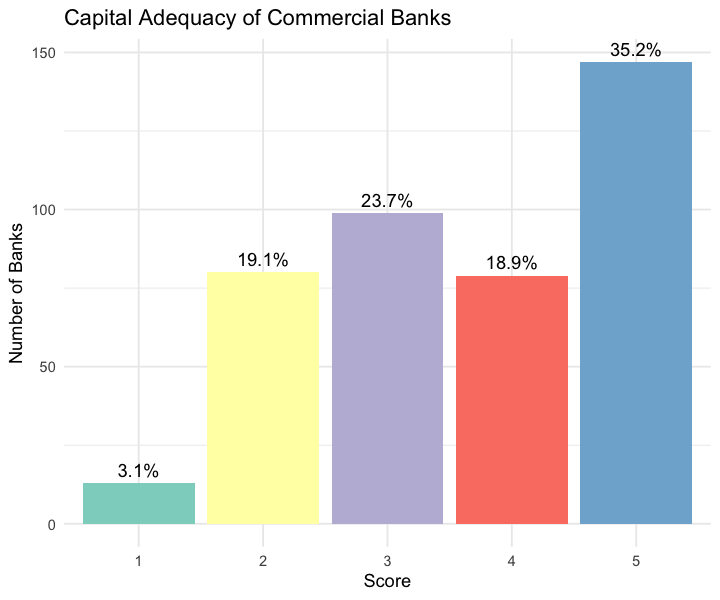

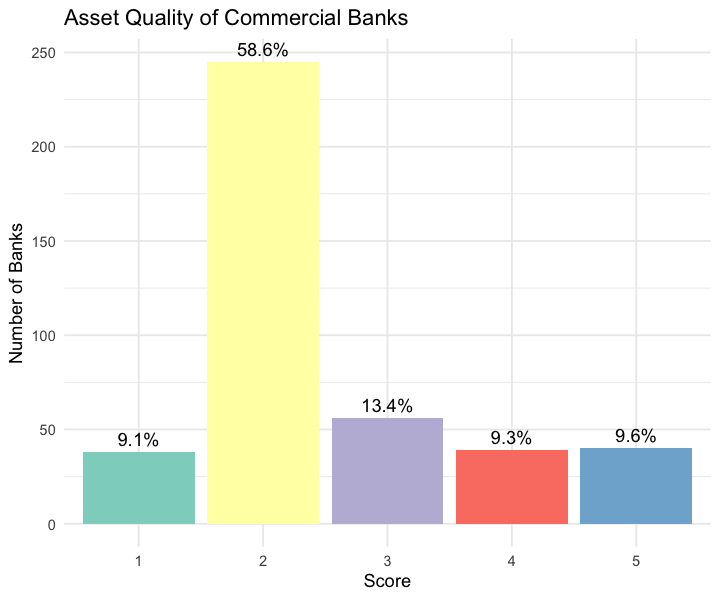

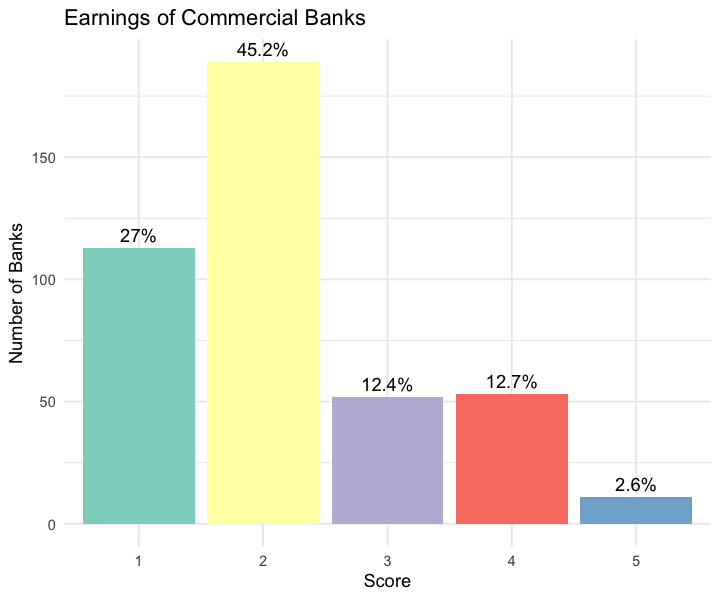

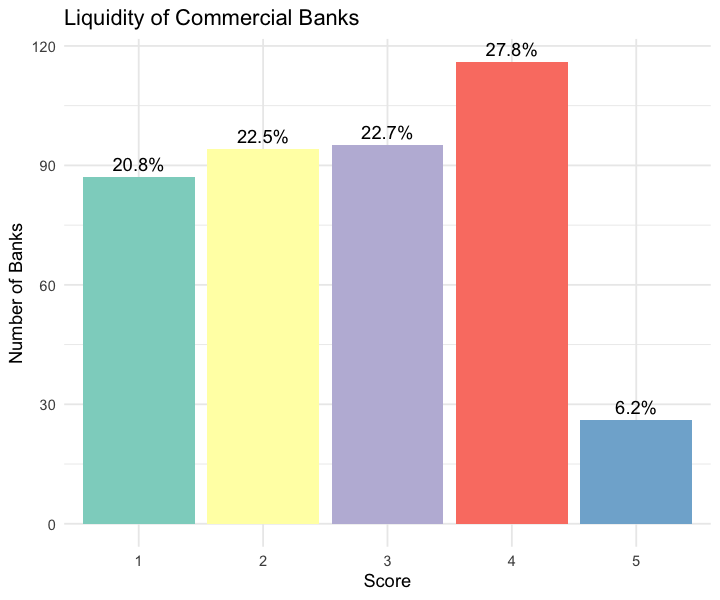

In [50]:
add_percentage <- function(data, score_column) {
  data %>%
    count(!!sym(score_column)) %>%
    mutate(percentage = n / sum(n) * 100)
}

options(repr.plot.width = 6, repr.plot.height = 5)
# Capital Adequacy (C)
c_percentages <- add_percentage(comm, "C_score")

ggplot(comm, aes(x = factor(C_score), fill = factor(C_score))) +
  geom_bar() +
  geom_text(data = c_percentages, aes(x = factor(C_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Capital Adequacy of Commercial Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Asset Quality (A)
a_percentages <- add_percentage(comm, "A_score")

ggplot(comm, aes(x = factor(A_score), fill = factor(A_score))) +
  geom_bar() +
  geom_text(data = a_percentages, aes(x = factor(A_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Asset Quality of Commercial Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Earnings (E)
e_percentages <- add_percentage(comm, "E_score")

ggplot(comm, aes(x = factor(E_score), fill = factor(E_score))) +
  geom_bar() +
  geom_text(data = e_percentages, aes(x = factor(E_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Earnings of Commercial Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Liquidity (L)
l_percentages <- add_percentage(comm, "L_score")

ggplot(comm, aes(x = factor(L_score), fill = factor(L_score))) +
  geom_bar() +
  geom_text(data = l_percentages, aes(x = factor(L_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Liquidity of Commercial Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")


# Investment Banks
* **Capital Adequacy (C)**: Higher risk exposure demands a CAR closer to 15%, with equity-to-assets of 10-12% or higher due to market volatility.


* **Asset Quality (A)**: Typically have lower NPLs on loan portfolios but may carry higher market risks. An NPL ratio <3% is preferable, with allowances of around 100% or more if high exposure exists.


* **Earnings (E)**: Higher profitability expected; target ROA >1.5%, ROE >15%, NIM may be less relevant, and cost-to-income ideally <50%.


* **Liquidity (L)**: Lower dependence on customer deposits, so deposits-to-assets may be <50%, with a flexible LTD ratio that reflects a balanced liquidity structure.


In [39]:
inv <- subset(data, Specialisation == 'Investment bank')
# Capital Adequacy (C) Score for Investment Banks
score_C_inv <- function(CAR, equity_to_assets) {
  if (CAR >= 15 && equity_to_assets >= 10) {
    return(5)
  } else if (CAR >= 12 && equity_to_assets >= 8) {
    return(4)
  } else if (CAR >= 10 && equity_to_assets >= 6) {
    return(3)
  } else if (CAR >= 8 && equity_to_assets >= 4) {
    return(2)
  } else {
    return(1)
  }
}
# Asset Quality (A) Score for Investment Banks
score_A_inv <- function(NPL_to_loans, allowance_ratio) {
  if (NPL_to_loans < 3 && allowance_ratio >= 100) {
    return(5)
  } else if (NPL_to_loans < 5 && allowance_ratio >= 90) {
    return(4)
  } else if (NPL_to_loans < 7 && allowance_ratio >= 80) {
    return(3)
  } else if (NPL_to_loans < 10) {
    return(2)
  } else {
    return(1)
  }
}
# Earnings (E) Score for Investment Banks
score_E_inv <- function(ROA, ROE, NIM, cost_to_income) {
  if (ROA >= 1.5 && ROE >= 15 && NIM >= 4 && cost_to_income <= 50) {
    return(5)
  } else if (ROA >= 1 && ROE >= 12 && NIM >= 3 && cost_to_income <= 60) {
    return(4)
  } else if (ROA >= 0.8 && ROE >= 10 && NIM >= 2.5 && cost_to_income <= 70) {
    return(3)
  } else if (ROA >= 0.5 && ROE >= 5) {
    return(2)
  } else {
    return(1)
  }
}
# Liquidity (L) Score for Investment Banks
score_L_inv <- function(deposits_to_assets, LTD) {
  if (deposits_to_assets < 50 && LTD >= 70 && LTD <= 90) {
    return(5)
  } else if (deposits_to_assets < 60 && LTD >= 60 && LTD <= 100) {
    return(4)
  } else if (deposits_to_assets < 70 && LTD >= 50 && LTD <= 110) {
    return(3)
  } else if (deposits_to_assets < 80 && LTD >= 40) {
    return(2)
  } else {
    return(1)
  }
}
# Calculate scores and add them as new columns for each bank in Investment Banks
inv$C_score <- mapply(score_C_inv, inv$CAR, inv$equity_capital2tot_assets)
inv$A_score <- mapply(score_A_inv, inv$NPLs2tot_loans, inv$allowance_for_loan_loss)
inv$E_score <- mapply(score_E_inv, inv$ROA, inv$ROE, inv$NIM, inv$cost2income)
inv$L_score <- mapply(score_L_inv, inv$customer_deposits2tot_assets, inv$LTD)

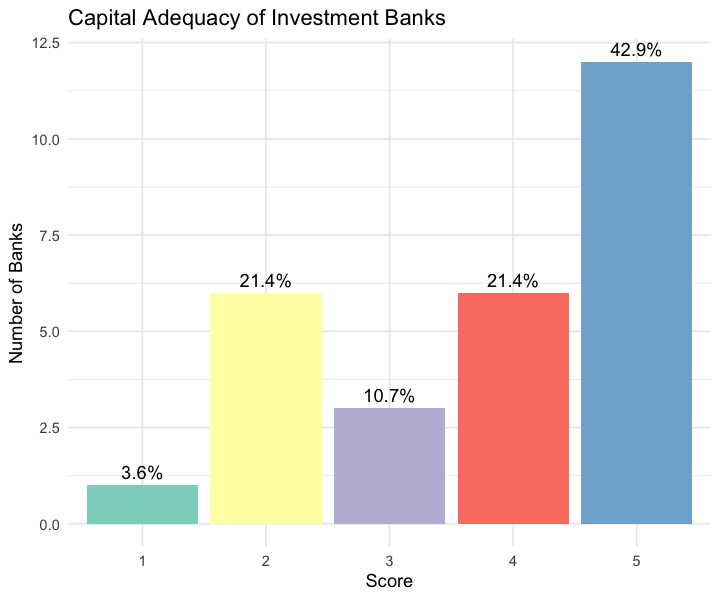

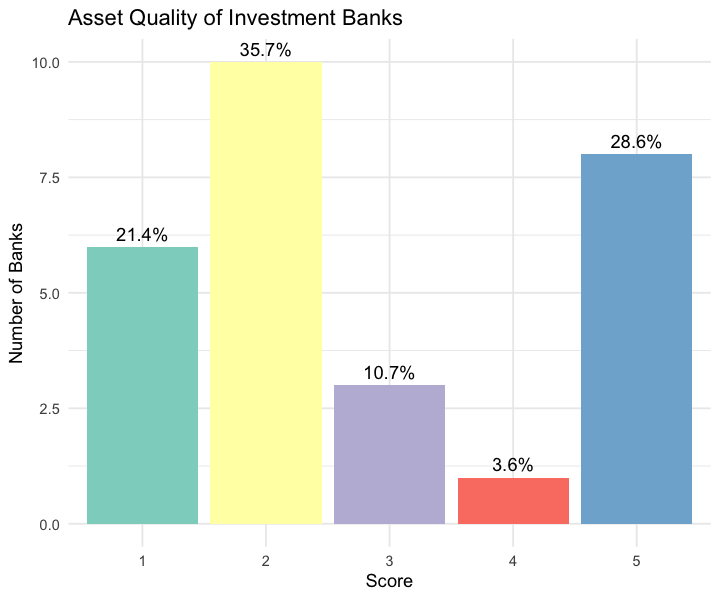

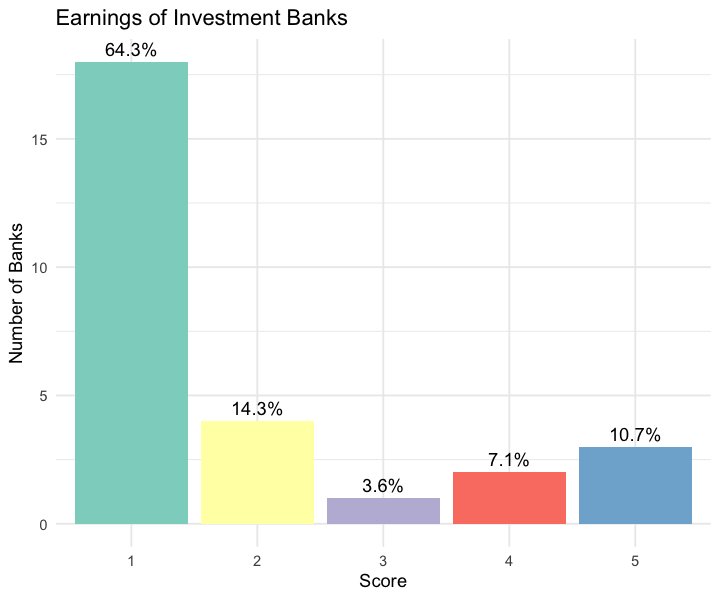

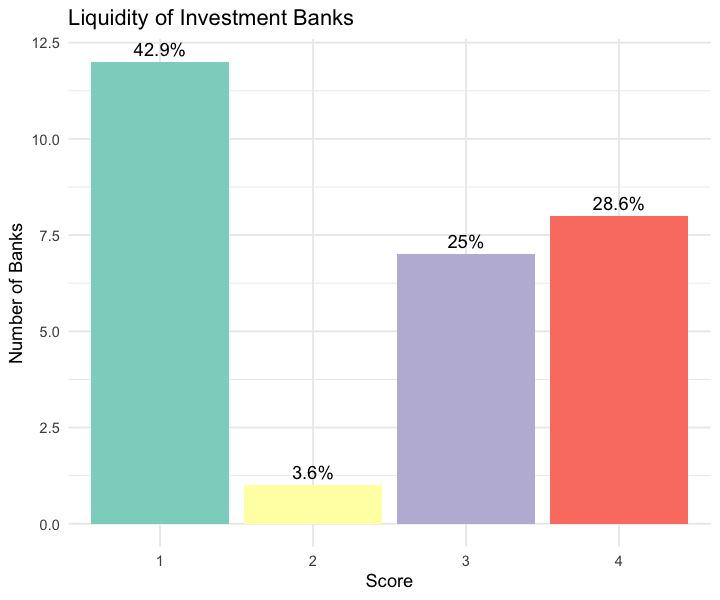

In [49]:
# Capital Adequacy (C) - Investment Banks
c_percentages_inv <- add_percentage(inv, "C_score")

options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(inv, aes(x = factor(C_score), fill = factor(C_score))) +
  geom_bar() +
  geom_text(data = c_percentages_inv, aes(x = factor(C_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Capital Adequacy of Investment Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Asset Quality (A) - Investment Banks
a_percentages_inv <- add_percentage(inv, "A_score")

ggplot(inv, aes(x = factor(A_score), fill = factor(A_score))) +
  geom_bar() +
  geom_text(data = a_percentages_inv, aes(x = factor(A_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Asset Quality of Investment Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Earnings (E) - Investment Banks
e_percentages_inv <- add_percentage(inv, "E_score")

ggplot(inv, aes(x = factor(E_score), fill = factor(E_score))) +
  geom_bar() +
  geom_text(data = e_percentages_inv, aes(x = factor(E_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Earnings of Investment Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Liquidity (L) - Investment Banks
l_percentages_inv <- add_percentage(inv, "L_score")

ggplot(inv, aes(x = factor(L_score), fill = factor(L_score))) +
  geom_bar() +
  geom_text(data = l_percentages_inv, aes(x = factor(L_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Liquidity of Investment Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")


# Cooperative banks
* **Capital Adequacy (C)**: Tend to have lower capital ratios, so CAR of 8-10% may suffice; equity-to-assets around 6-8%.

* **Asset Quality (A)**: May tolerate slightly higher NPL ratios (up to 7-8%) due to their community focus, with allowances around 80-100%.


* **Earnings (E)**: Lower profit focus means acceptable ROA ~0.5-1%, ROE ~5-8%, NIM around 2-3%, and cost-to-income can be slightly higher at 60-70%.


* **Liquidity (L)**: Higher reliance on stable deposits, so customer deposits to assets >70%, and LTD ratio <80%.

In [41]:
coop <- subset(data, Specialisation == 'Cooperative bank')

# Capital Adequacy (C) Score for Cooperative Banks
score_C_coop <- function(CAR, equity_to_assets) {
  if (CAR >= 10 && equity_to_assets >= 8) {
    return(5)
  } else if (CAR >= 8 && equity_to_assets >= 6) {
    return(4)
  } else if (CAR >= 6 && equity_to_assets >= 4) {
    return(3)
  } else if (CAR >= 4 && equity_to_assets >= 2) {
    return(2)
  } else {
    return(1)
  }
}

# Asset Quality (A) Score for Cooperative Banks
score_A_coop <- function(NPL_to_loans, allowance_ratio) {
  if (NPL_to_loans < 5 && allowance_ratio >= 100) {
    return(5)
  } else if (NPL_to_loans < 7 && allowance_ratio >= 90) {
    return(4)
  } else if (NPL_to_loans < 8 && allowance_ratio >= 80) {
    return(3)
  } else if (NPL_to_loans < 10) {
    return(2)
  } else {
    return(1)
  }
}

# Earnings (E) Score for Cooperative Banks
score_E_coop <- function(ROA, ROE, NIM, cost_to_income) {
  if (ROA >= 1 && ROE >= 8 && NIM >= 3 && cost_to_income <= 60) {
    return(5)
  } else if (ROA >= 0.8 && ROE >= 6 && NIM >= 2.5 && cost_to_income <= 70) {
    return(4)
  } else if (ROA >= 0.6 && ROE >= 5 && NIM >= 2 && cost_to_income <= 80) {
    return(3)
  } else if (ROA >= 0.5 && ROE >= 5) {
    return(2)
  } else {
    return(1)
  }
}

# Liquidity (L) Score for Cooperative Banks
score_L_coop <- function(deposits_to_assets, LTD) {
  if (deposits_to_assets > 70 && LTD < 80) {
    return(5)
  } else if (deposits_to_assets > 60 && LTD < 90) {
    return(4)
  } else if (deposits_to_assets > 50 && LTD < 100) {
    return(3)
  } else if (deposits_to_assets > 40 && LTD < 110) {
    return(2)
  } else {
    return(1)
  }
}

# Calculate scores and add them as new columns for each bank in Cooperative Banks
coop$C_score <- mapply(score_C_coop, coop$CAR, coop$equity_capital2tot_assets)
coop$A_score <- mapply(score_A_coop, coop$NPLs2tot_loans, coop$allowance_for_loan_loss)
coop$E_score <- mapply(score_E_coop, coop$ROA, coop$ROE, coop$NIM, coop$cost2income)
coop$L_score <- mapply(score_L_coop, coop$customer_deposits2tot_assets, coop$LTD)

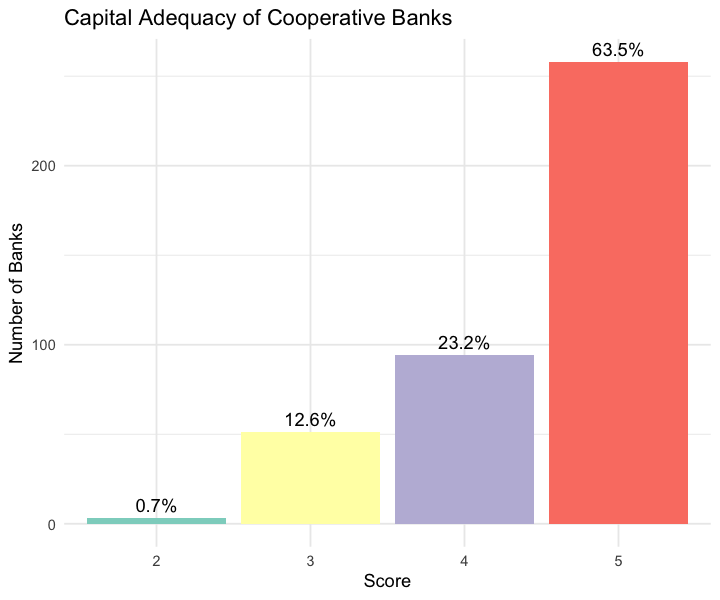

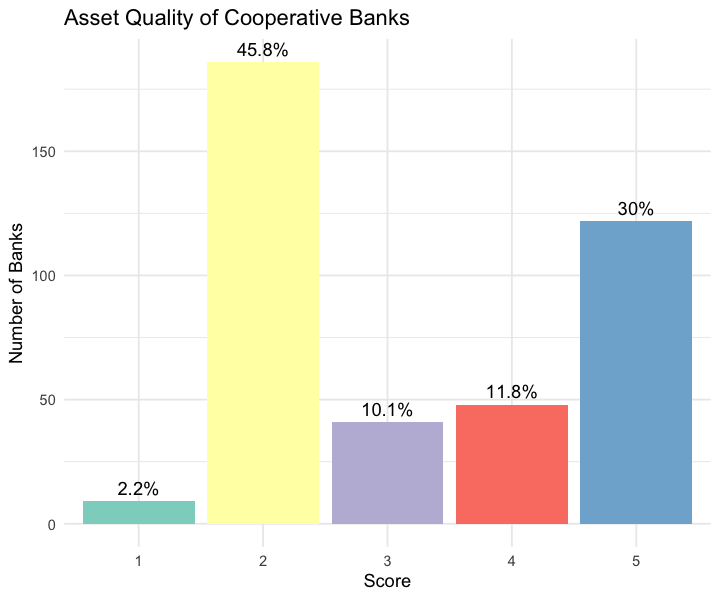

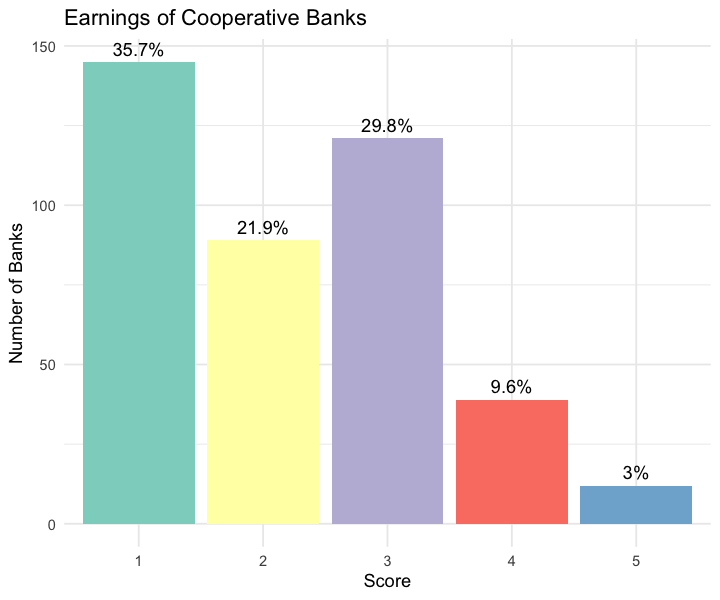

ERROR: Error in grid.arrange(plot1, plot2, plot3, plot4, ncol = 2): non trovo la funzione "grid.arrange"


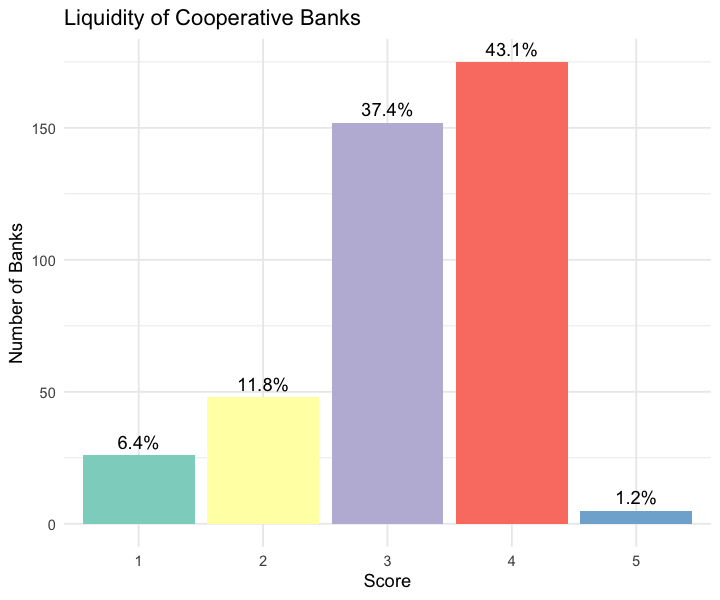

In [48]:
# Capital Adequacy (C) - Cooperative Banks
c_percentages_coop <- add_percentage(coop, "C_score")

options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(coop, aes(x = factor(C_score), fill = factor(C_score))) +
  geom_bar() +
  geom_text(data = c_percentages_coop, aes(x = factor(C_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Capital Adequacy of Cooperative Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Asset Quality (A) - Cooperative Banks
a_percentages_coop <- add_percentage(coop, "A_score")

ggplot(coop, aes(x = factor(A_score), fill = factor(A_score))) +
  geom_bar() +
  geom_text(data = a_percentages_coop, aes(x = factor(A_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Asset Quality of Cooperative Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Earnings (E) - Cooperative Banks
e_percentages_coop <- add_percentage(coop, "E_score")

ggplot(coop, aes(x = factor(E_score), fill = factor(E_score))) +
  geom_bar() +
  geom_text(data = e_percentages_coop, aes(x = factor(E_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Earnings of Cooperative Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")

# Liquidity (L) - Cooperative Banks
l_percentages_coop <- add_percentage(coop, "L_score")

ggplot(coop, aes(x = factor(L_score), fill = factor(L_score))) +
  geom_bar() +
  geom_text(data = l_percentages_coop, aes(x = factor(L_score), y = n, label = paste0(round(percentage, 1), "%")),
            vjust = -0.5, color = "black") +
  labs(
    title = "Liquidity of Cooperative Banks",
    x = "Score",
    y = "Number of Banks"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  theme(legend.position = "none")
grid.arrange(plot1, plot2, plot3, plot4, ncol = 2)

In [45]:
extract_highest_score <- function(data, score_column) {
  score_table <- table(data[[score_column]])
  percentages <- prop.table(score_table) * 100
  highest_score <- names(score_table)[which.max(percentages)]
  highest_percentage <- round(max(percentages), 1)
  return(paste(highest_score, "(", highest_percentage, "%)", sep = ""))
}
capital_adequacy_inv <- extract_highest_score(inv, "C_score")
asset_quality_inv <- extract_highest_score(inv, "A_score")
earnings_inv <- extract_highest_score(inv, "E_score")
liquidity_inv <- extract_highest_score(inv, "L_score")
capital_adequacy_comm <- extract_highest_score(comm, "C_score")
asset_quality_comm <- extract_highest_score(comm, "A_score")
earnings_comm <- extract_highest_score(comm, "E_score")
liquidity_comm <- extract_highest_score(comm, "L_score")
capital_adequacy_coop <- extract_highest_score(coop, "C_score")
asset_quality_coop <- extract_highest_score(coop, "A_score")
earnings_coop <- extract_highest_score(coop, "E_score")
liquidity_coop <- extract_highest_score(coop, "L_score")

result_table <- data.frame(
  "Type of Bank" = c("Investment Banks", "Commercial Banks", "Cooperative Banks"),
  "Capital Adequacy" = c(capital_adequacy_inv, capital_adequacy_comm, capital_adequacy_coop),
  "Asset Quality" = c(asset_quality_inv, asset_quality_comm, asset_quality_coop),
  "Earnings" = c(earnings_inv, earnings_comm, earnings_coop),
  "Liquidity" = c(liquidity_inv, liquidity_comm, liquidity_coop)
)
print(result_table)

       Type.of.Bank Capital.Adequacy Asset.Quality Earnings Liquidity
1  Investment Banks         5(42.9%)      2(35.7%) 1(64.3%)  1(42.9%)
2  Commercial Banks         5(35.2%)      2(58.6%) 2(45.2%)  4(27.8%)
3 Cooperative Banks         5(63.5%)      2(45.8%) 1(35.7%)  4(43.1%)


# Conclusions:
**Investment banks** generally exhibit a strong capital adequacy profile, with 42.9% scoring the highest possible score (5) in this category. This indicates that investment banks tend to maintain solid capital buffers with a high Capital Adequacy Ratio (CAR) and equity-to-assets ratio, reflecting their need to hold more capital due to the higher risk exposure they face. However, a significant portion of investment banks (35.7%) score 2 in asset quality, suggesting that they may struggle more than other types of banks in managing non-performing loans (NPLs) or provisions. Earnings are another area of concern for investment banks, with 64.3% of them scoring 1, indicating low profitability, which could be attributed to the market volatility and the high-risk, high-reward nature of their business models. Regarding liquidity, 42.9% of investment banks score 1, which reflects a reliance on less stable funding sources and a weaker liquidity position compared to other bank types.


**Commercial banks**, on the other hand, have 35.2% scoring 5 in capital adequacy, demonstrating a relatively strong capital position. However, 58.6% score 2 in asset quality, indicating challenges with non-performing loans, although their overall capital adequacy is solid. In terms of earnings, the performance of commercial banks is somewhat balanced, with 45.2% scoring 2, signaling moderate profitability. The remaining commercial banks have mixed earnings scores in the 3 and 4 ranges, reflecting a more stable but not exceptional profit generation capacity. Commercial banks are relatively better in liquidity than investment banks, with 27.8% scoring 4, showing a better balance between customer deposits and liquidity management, although the 35.2% scoring 2 suggests room for improvement.


**Cooperative banks** excel in capital adequacy, with 63.5% scoring 5, indicating strong capital buffers. This could be due to their more conservative approach to risk and focus on long-term stability. In asset quality, 45.8% of cooperative banks score 2, indicating challenges with NPLs, although this is not as severe as the performance seen in investment banks. A large proportion of cooperative banks (35.7%) score 1 in earnings, suggesting lower profitability, which could be the result of their community-focused business model and lower emphasis on maximizing returns. Cooperative banks also maintain a strong liquidity position, with 43.1% scoring 4, reflecting their reliance on stable customer deposits, but the 35.7% scoring 1 indicates that some banks face challenges in managing liquidity.


Overall, investment banks have the strongest capital adequacy but face significant challenges in earnings and liquidity, reflecting their high-risk, high-reward nature. Commercial banks show more balanced performance, with solid capital adequacy but room for improvement in asset quality and liquidity. Cooperative banks are more focused on stability, excelling in capital adequacy and liquidity, although they face challenges in profitability and managing asset quality.